In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from numpy import isnan
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std
from IPython.display import Image
import os

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Project/Maketing Campaign/marketing_campaign.csv", delimiter = ";")

#Data preprocessing

## Types of Data and Data Integrity

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We can inform from this data :
1. Have 3 categorical variables and 26 numerical variables
2. The income has missing values

## Feature Engineering

We can select few columns/variables that are relevant and useful for this analysis purpose.
*   Variable **Age** will be created from Current year (2024) substracted **Year_Birth**
*   Variable **Spending** total the amount of spending from 6 product categories
* Variable **Marital_Situation** for categorizing in binary term either someone is in relationship or alone
* Variable **Has_Child** a binary category to differ the group between individual who has 1 or more child or not have child at all
* Variable **Educational_years** as the total number of years of education the individual achieved according to its diploma

We will also use Variable Income and remove the rest.





In [ ]:
data["Marital_Status"].unique().tolist()

['Single',
 'Together',
 'Married',
 'Divorced',
 'Widow',
 'Alone',
 'Absurd',
 'YOLO']

In [ ]:
data["Kidhome"].unique().tolist()

[0, 1, 2]

In [ ]:
data["Dt_Customer"].max()

'2014-06-29'

Since the latest date from this dataset is 2014, we gonna use 2014 as point current year for this marketing analysis

In [ ]:
data["Age"] = 2014 - data["Year_Birth"]
data["Spending"] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data["Marital_Situation"] = data["Marital_Status"].replace(
  {'Single': 'Alone',
 'Together' : 'In relationship',
 'Married' :'In relationship',
 'Divorced':'Alone',
 'Widow':'Alone',
 'Alone':'Alone',
 'Absurd':'Alone',
 'YOLO':'Alone'})
data["Has_child"] = np.where(data.Kidhome+data.Teenhome>0, 'Yes', 'No')
data["Educational_years"] = data['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})
data=data[['Age','Income','Spending','Marital_Situation','Has_child','Education','Educational_years']]

##Statistical Summary

In [ ]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,Age,Income,Spending,Educational_years
count,2240.00,2216.00,2240.00,2240.00
mean,45.19,52247.25,605.80,14.41
std,11.98,25173.08,602.25,4.51
min,18.00,1730.00,5.00,5.00
25%,37.00,35303.00,68.75,12.00
50%,44.00,51381.50,396.00,12.00
75%,55.00,68522.00,1045.50,18.00
max,121.00,666666.00,2525.00,21.00


* The average age of the customers is approximately 45
years, with the youngest being 18 years old and the oldest reaching an exceptionally rare age of 121 years.

* The average income is 52K, with a median income of 51K, indicating a distribution that may be right-skewed. This is further supported by the fact that the maximum income is as high as 666K while the 75th percentile is at 68K.

* Average spending over the last two years is 606, with a median spending amount of 396. The spending data is also right-skewed, as the maximum spending amount is 2K, significantly higher than the 75th percentile of 1,045.5.

* The average number of years of education among the customers is 14.4 years, corresponding to a Bachelor's degree. The range of educational years varies from 5 years (below high school level) to a maximum of 21 years (likely indicating advanced degrees).

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

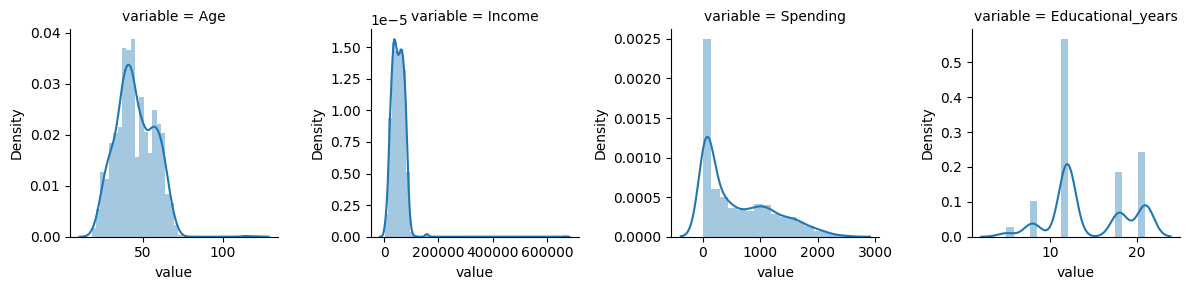

In [ ]:
df = pd.DataFrame(data=data, columns=['Age','Income','Spending','Educational_years'])
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

## Handling Outliers

Identified the outliers using IQR (Q3-Q1)

*   Value that 1.5 times greater/lower than the IQR we categorized it as Mild Outlier
*   Else, value that 3 timers greater/lower than the IQR, we categorized it as Extreme Outlier (which result to be removed later)



In [ ]:
fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

* Variable age, which has 3 values that are greater than the upper fence (74) we won't remove it

* For income, we will remove the value 666k which identified as Extreme Outlier

* For the spending, we will keep the outlier value

In [ ]:
data= data.drop(data[data["Income"] > 600000].index).reset_index(drop=True)
data

,Age,Income,Spending,Marital_Situation,Has_child,Education,Educational_years
0,57,58138.00,1617,Alone,No,Graduation,12
1,60,46344.00,27,Alone,Yes,Graduation,12
2,49,71613.00,776,In relationship,No,Graduation,12
3,30,26646.00,53,In relationship,Yes,Graduation,12
4,33,58293.00,422,In relationship,Yes,PhD,21
...,...,...,...,...,...,...,...
2234,47,61223.00,1341,In relationship,Yes,Graduation,12
2235,68,64014.00,444,In relationship,Yes,PhD,21
2236,33,56981.00,1241,Alone,No,Graduation,12
2237,58,69245.00,843,In relationship,Yes,Master,18


## Handling Null Values

KNN Imputation effectively fills missing values by leveraging the similarity between data points, preserving the dataset's structure and variability. It’s adaptive, doesn’t assume linear relationships, and automatically normalizes data, making it robust for various datasets.

In [ ]:
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# fit on the dataset
imputer.fit(data[['Income','Age','Educational_years']])
# transform the dataset
X = imputer.transform(data[['Income','Age','Educational_years']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','Educational_years'])
data['Income']=Income_impute['Income'].reset_index(drop=True)
count_nan = len(data) - data.count()
print(count_nan)

Age                  0
Income               0
Spending             0
Marital_Situation    0
Has_child            0
Education            0
Educational_years    0
dtype: int64


#Visual EDA

### Diploma Distribution by Income Level

In [ ]:
fig = px.histogram(data, x="Income", color = "Education", nbins = 10, histnorm = 'percent', barnorm = 'fraction', barmode = 'relative')
fig.show()


Income Range 20k-40k: The distribution is dominated by individuals with basic education (about 70%), followed by a small presence of other education levels.

Income Range 60k-80k: This range has a more balanced distribution, with Graduation and Master’s education making up about 30% each, and PhD around 20%.

Income Range 100k-120k: PhD holders dominate this range, making up approximately 60% of the population in this income bracket.

Income Range 140k-160k: PhD holders again dominate, accounting for nearly 90% of individuals in this range.

The chart highlights that higher income brackets (above 100k) are predominantly composed of individuals with higher education levels, particularly PhD holders. Lower income brackets have a more varied distribution, with basic education being more prevalent.

### Average Income by Diploma

In [ ]:
df = data[['Income','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Income",  histfunc='avg',category_orders=category_orders)
fig.show()

Average income is the highest for PhD owners with 56161 dollars
Average income is the lowest for Basic diploma owners with 20306 dollars
The better the diploma is, the higher the average salary
We will verify later with a statistical test if the average salary of PhD owners is statistically different from Master owners

### Spending by Income

In [ ]:
reg = LinearRegression().fit(np.vstack(data['Spending']), data['Income'])
df['bestfit'] = reg.predict(np.vstack(data['Spending']))

fig = go.Figure(data=go.Scatter(name='observations',x=data['Spending'], y=data['Income'],mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=data['Spending'], y=df['bestfit'], mode='lines'))
fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.show()

<ipython-input-19-a414315858ad>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Higher spending seems positively correlated with higher income

We will verify later with a statistical test if the correlation between the annual income and the amount of spending is statistically significant

### Diploma distribution by Relationship Status

In [ ]:
df = data[['Education','Marital_Situation']]

fig = px.sunburst(df, path=['Marital_Situation','Education'],color_discrete_sequence=px.colors.diverging.Spectral)
fig.show()

The distribution between these two marital status seems identical
Therefore, we could tempted to believe there is no correlation between diploma and marital status.

We will verify this this hypothesis later in hypothesis section

### Income level by parental status

In [ ]:
cut_labels_Income = ['Low income', 'low-Medium income', 'Medium-high income', 'High income']
data['Income_bins'] = pd.qcut(data['Income'], q=4,labels=cut_labels_Income)

df = data[['Income_bins','Has_child']]

fig = px.sunburst(df, path=['Has_child','Income_bins'],color_discrete_sequence=px.colors.diverging.Portland)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



We created here 4 segments to cluster individuals by their income level based on quartiles We could tempted to believe the individuals who is not a parent tend to have more higher income.

We will verify later if there is a correlation between the income and the fact to have at least one child

# Statistical Hypothesis Testing
Before running any statistical hypothesis test, It's mandatory to conduct normality test, to see whether our data is follow the gaussian distribution so we could know which statistical test is to use (Parametric/Non-Parametric),

To get the best result, is best to combine graphical methods and statistical methods

## A. Normality Test

### a. Graphical Method
Histogram Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:



`distplot` is a dep

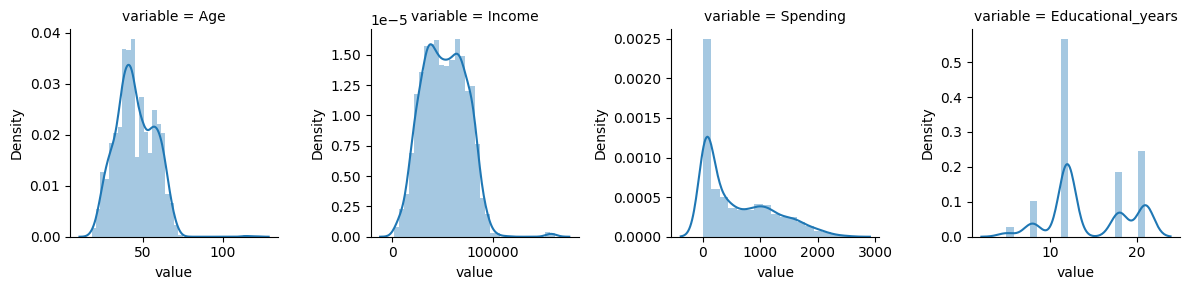

In [ ]:
df = pd.DataFrame(data=data, columns=['Age','Income','Spending','Educational_years'])
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

With this graphical method we could see which variables is Gaussian or Gaussian-like

* Age and Income has Gaussian-like distribution
* Spending has log-normal distribution
* Education years has Multimodal-distributions


if p-value  ≤𝛼
  : We reject the null hypothesis and conclude of a non Gaussian distribution

if p-value  >𝛼
  : We fail to reject the null hypothesis and conclude of a Gaussian distribution

With  𝛼
  being the significance level

### b. Statistical Method
Shapiro Test

In [ ]:
X = ['Age', 'Income', 'Spending', 'Educational_years']
column_dict = {elem : pd.DataFrame for elem in X }

def shapiro_test(data):
    stat, p = shapiro(data)
    print('%s : Statistics=%.3f, p=%.3f' % (column,stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0)')
    else:
        print('Sample does not look Gaussian (We reject H0)')

for column in X:
  column_dict[column] = data[column]
  shapiro_test(column_dict[column])


Age : Statistics=0.976, p=0.000
Sample does not look Gaussian (We reject H0)
Income : Statistics=0.976, p=0.000
Sample does not look Gaussian (We reject H0)
Spending : Statistics=0.865, p=0.000
Sample does not look Gaussian (We reject H0)
Educational_years : Statistics=0.833, p=0.000
Sample does not look Gaussian (We reject H0)


All the p-values are inferior to 0.05 :
We reject the null-hypothesis. Our variables are not Gaussian at a 5% significance level

Which means we cannot use parametric statistical test
We will go for nonparametric statistical methods to test our hypotheses

## B. Rank Significance Test

### a. Numerical variables : Mann-Whitney's test
Question 1 : Is the average income of PhD owners is statistically different from the average income of Master owners?

#### 1. Hypothesis statement  
* __$H_0$__ : The mean ranks of the two groups are equal  
* __$H_a$__ : The mean ranks of the two groups are not equal


#### 2. Analysis plan formulation  
* __Significance level :__ We will test our hypothesis at a 5% significance level  
  
  
* __Test method :__ The Mann-Whitney U test checks if one group generally has higher or lower values than another group. It doesn’t assume the data is normally distributed and compares whether the values in the two groups are likely different. If the test shows a significant difference, it means the groups probably don't have the same distribution.

#### 3. Analyze Sample Data

We will see whether the PHDs and Masters are in Gaussian Distribution or not

In [ ]:
#Creation of the samples
Diploma=data[['Education','Income']]

Phd_graduate=Diploma[Diploma['Education']=='PhD']
Master_graduate=Diploma[Diploma['Education']=='Master']
Basic_graduate=Diploma[Diploma['Education']=='Basic']
Second_cycle_graduate=Diploma[Diploma['Education']=='2n Cycle']
Graduation_graduate=Diploma[Diploma['Education']=='Graduation']

In [ ]:
# normality tests of our two samples
stat, p = shapiro(Phd_graduate.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
stat, p = shapiro(Master_graduate.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)


Seems like the PHD's and Masters are not in Gaussian Distribution,

Therefore we can use the Mann-Whitney's test

In [ ]:
# summarize
print('PhD: median = %.0f stdv = %.1f' % (median(Phd_graduate.Income), std(Phd_graduate.Income)))
print('Master: median = %.0f stdv = %.1f' % (median(Master_graduate.Income), std(Master_graduate.Income)))

print(stats.mannwhitneyu(Phd_graduate.Income, Master_graduate.Income))

if p > alpha:
	print('Means are not statistically different (We fail to reject H0)')
else:
	print('Means are statistically different (We reject H0)')

PhD: median = 55223 stdv = 20490.1
Master: median = 50943 stdv = 20012.9
MannwhitneyuResult(statistic=97824.5, pvalue=0.027216499429648332)
Means are statistically different (We reject H0)


#### 4. Interpret the results

The p-value is __inferior__ than the significance level of 5%, we can __reject the null hypothesis__.<br>    
We can conclude that the average income of PhD owners is different from the average income of Master owners at a 95% confidence level

## C. Rank Correlation Test

### a. Numerical Varriables : Spearman Rank Correlation Test

Second Question : Is there a statistically significant correlation between income and the spending amount?

#### 1. Hypothesis Statement
* __$H_0$__ : There is no monotonic association between income and spending amount  
* __$H_a$__ : There is a monotonic association between income and spending amount

#### 2. Analysis plan formulation  
* __Significance level__ : We will test our hypothesis at 5% significance level  
* __Test method__ : We use the Spearman rank correlation test to determine if our two variables are correlated. This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).  
Therefore, if our assumption is correct, the result of the test should enable us to reject the null hypothesis.

#### 3. Analyze Sample Data

In [ ]:
spending = data[['Spending', 'Income']]

cor, pval = stats.spearmanr(spending[['Spending']], spending[['Income']])
print("Non parametric Spearman Result test : correlation coefficient : %.4f, pval : %.4f" % (cor, pval))

Non parametric Spearman Result test : correlation coefficient : 0.8464, pval : 0.0000


#### 4. Interpret the result
The p-value close to 0 confirms that we can reject the null hypothesis that the two variables are uncorrelated. We conclude that the correlation between income and spending amount is statistically significant at a 95% confidence level. The high correlation coefficient indicates a strong positive relationship between the two variables, supporting our hypothesis.

### b. Categorical Variables

Third Question : Is there a statistically significant correlation between the diploma and marital situation

#### 1. Hypothesis statement
__$H_0$__ : Education and Marital_Situation are independant  
__$H_a$__ : Education and Marital_Situation are not independant

#### 2. Analysis plan formulation  
* __Significance level__ : We will test our hypothesis at a 5% significance level  
* __Test method__ : We use the Chi-square test for independence to determine whether there is a significant relationship between our two categorical variables.

#### 3. Analyze Sample Data

In [ ]:
Marital_Situation=data[['Education','Marital_Situation']]
crosstab = pd.crosstab(Marital_Situation["Education"], Marital_Situation["Marital_Situation"])
crosstab

Marital_Situation,Alone,In relationship
Education,,
2n Cycle,65,138
Basic,20,34
Graduation,408,718
Master,126,244
PhD,177,309


In [ ]:
import builtins
print = builtins.print
stat, p, dof, expected = chi2_contingency(crosstab)
print(f'Degrees of freedom = {dof}')


Degrees of freedom = 4


In [ ]:
print(expected)

[[ 72.16971862 130.83028138]
 [ 19.19785619  34.80214381]
 [400.31085306 725.68914694]
 [131.54086646 238.45913354]
 [172.78070567 313.21929433]]


In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=9.488, stat=1.908


In [ ]:
if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

Independent (We fail to reject H0)
significance=0.050, p=0.753
Independent (We fail to reject H0)


#### 4. Interpret the results
We can interpret the results by two ways :
- The P-value is superior than the significance level of 5%, we __fail to reject the null hypothesis__.     
- The Test-statistic is inferior than the critical value, we __fail to reject the null hypothesis__.     


We can conclude that the marital status is __independant__ from the diploma owned at a 95% confidence level

### Numerical and Categorical variables : Point-Biseral Correlation test

Fourth Question : Is there a correlation between income the income and the fact to have at least one child

#### 1. Hypothesis Statement

* __$H_0$__ : Education and Has_child are independant  
* __$H_a$__ : Education and Has_child are not independant

#### 2. Analysis plan formulation
* __Significance level__ : We will test our hypothesis at 5% significance level  
* __Test method__ : As our categorical variable is a binary variable and its categories don't have a natural ordering (it doesn't matter if *Yes* is coded 1 or 0), we can transform it in a continuous variable and use a special case of the Pearson Correlation named Point-Biserial Correlation.<br> Point-Biserial Correlation assumes continuous data within each group created by the binary variable to be Gaussian (Here the income)

In [ ]:
data['Has_child_bool'] = np.where(data.Has_child == 'Yes', 1, 0)

#### 3. Analyze Sample Data
First step, we have to normalize the Income data using Box-Cox Transformation

Here we use the continuous variable Income and not the categorical variable Income_bins created earlier as it's nearly always a bad idea to categorize continuous variable to test independance

In [ ]:
data['Income']

,Income
0,58138.00
1,46344.00
2,71613.00
3,26646.00
4,58293.00
...,...
2234,61223.00
2235,64014.00
2236,56981.00
2237,69245.00


In [ ]:
income_child = data[['Has_child_bool',"Income"]]
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'box-cox', standardize= True)
rescaler = pt.fit_transform(income_child[['Income']])
income_child[['Income']]=rescaler

<ipython-input-54-9d515b8ab777>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
income_child

,Has_child_bool,Income
0,0,0.34
1,1,-0.20
2,0,0.92
3,1,-1.20
4,1,0.35
...,...,...
2234,1,0.48
2235,1,0.60
2236,0,0.29
2237,1,0.82


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




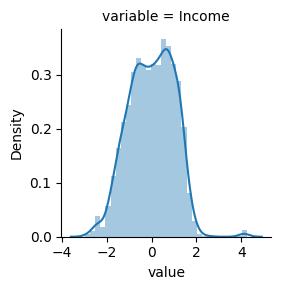

In [ ]:
nd = pd.melt(income_child, value_vars =income_child[['Income']] )
n1 = sns.FacetGrid (nd, col='variable')
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
from scipy.stats import normaltest
stat, p = normaltest(income_child[['Income']])
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Sample looks like gaussian (Fail to reject H0)')
else:
  print('Sample does not looks like Gaussian (Reject H0)')

Statistics=0.485, p=0.785
Sample looks like gaussian (Fail to reject H0)


<ipython-input-60-01d48bde4276>:3: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
income_child['Income'].describe()

,Income
count,2239.00
mean,-0.00
std,1.00
min,-2.96
25%,-0.74
50%,0.03
75%,0.78
max,4.27


Both the normalized distribution plot and the results of the D'Agostino and Pearson's test confirm that our Income variable follows a Gaussian (normal) distribution. The variable has a mean of 0 and a standard deviation of 1. With this confirmation, we can proceed to run the Point-Biserial Correlation test.

In [ ]:
print(stats.pointbiserialr, income_child.Has_child_bool,income_child.Income)

<function pointbiserialr at 0x7c05bc095900> 0       0
1       1
2       0
3       1
4       1
       ..
2234    1
2235    1
2236    0
2237    1
2238    1
Name: Has_child_bool, Length: 2239, dtype: int64 0       0.34
1      -0.20
2       0.92
3      -1.20
4       0.35
        ... 
2234    0.48
2235    0.60
2236    0.29
2237    0.82
2238    0.10
Name: Income, Length: 2239, dtype: float64


#### 4. Interpret the results

The p-value close to 0 confirms that we can reject the null hypothesis that the two variables, income and the binary variable Has_child, are uncorrelated. This indicates that the correlation between income and whether or not an individual has at least one child is statistically significant at a 95% confidence level. The negative correlation coefficient further suggests that there is a moderate negative relationship between income and having at least one child, aligning with our initial expectations.